In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

# DATASET PREPARING

In [2]:
# Wczytanie danych z pliku
save_path = "dataset.npz"
data = np.load(save_path)

# Odczytaj macierze X i y
X= data['X']
y = data['y']

actions = np.array(['hello', 'thankyou', 'love', 'friend', 'good', 'meet', 'you', 'think', 'bed', 'have'])


In [3]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [4]:
X_train.shape

(210, 30, 1662)

In [5]:
y_train.shape

(210, 10)

In [6]:
X_validation.shape

(45, 30, 1662)

# GRU

In [44]:

model = tf.keras.Sequential([

    tf.keras.layers.GRU(units=128, input_shape=(30, 1662), return_sequences=True),

    tf.keras.layers.GRU(units=64, return_sequences=True),

    tf.keras.layers.GRU(units=32, return_sequences=True),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128),

    tf.keras.layers.Dense(64),

    tf.keras.layers.Dense(10, activation='softmax') 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.8, beta_2=0.85),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


num_epochs = 100
batch_size = 21

history_gru = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_validation, y_validation))

model.save_weights('gru_weights.h5')



Epoch 1/100
10/10 [==============================] - 24s 820ms/step - loss: 2.3212 - categorical_accuracy: 0.1238 - val_loss: 2.2424 - val_categorical_accuracy: 0.2222
Epoch 2/100
10/10 [==============================] - 2s 187ms/step - loss: 2.1607 - categorical_accuracy: 0.2143 - val_loss: 2.1412 - val_categorical_accuracy: 0.1111
Epoch 3/100
10/10 [==============================] - 2s 187ms/step - loss: 1.9947 - categorical_accuracy: 0.2952 - val_loss: 1.8753 - val_categorical_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 2s 190ms/step - loss: 1.7543 - categorical_accuracy: 0.4810 - val_loss: 1.6502 - val_categorical_accuracy: 0.3556
Epoch 5/100
10/10 [==============================] - 2s 190ms/step - loss: 1.5418 - categorical_accuracy: 0.4762 - val_loss: 1.4121 - val_categorical_accuracy: 0.5778
Epoch 6/100
10/10 [==============================] - 2s 213ms/step - loss: 1.3880 - categorical_accuracy: 0.5190 - val_loss: 1.3448 - val_categorical_accuracy: 0.51

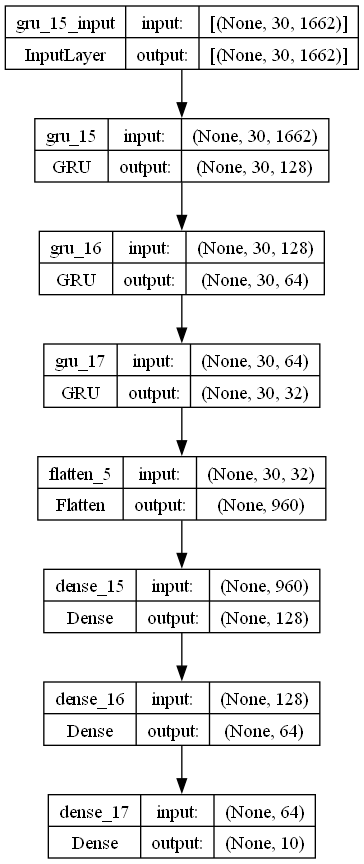

In [45]:
from tensorflow.keras.utils import plot_model


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)



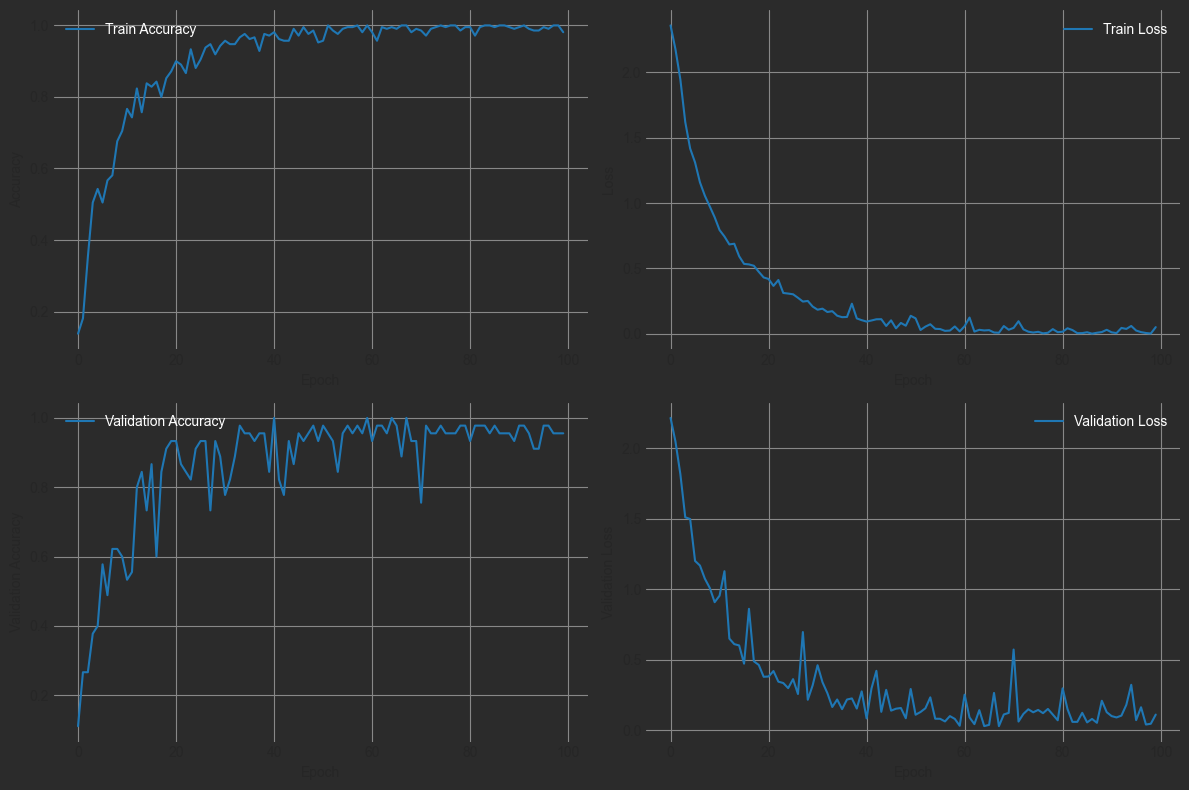

In [33]:
import matplotlib.pyplot as plt


# Wyświetlanie wykresów
plt.figure(figsize=(12, 8))

# Wykres dokładności trenowania
plt.subplot(2, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Wykres straty trenowania
plt.subplot(2, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Wykres dokładności walidacji
plt.subplot(2, 2, 3)
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

# Wykres straty walidacji
plt.subplot(2, 2, 4)
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7940\2581471282.py:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



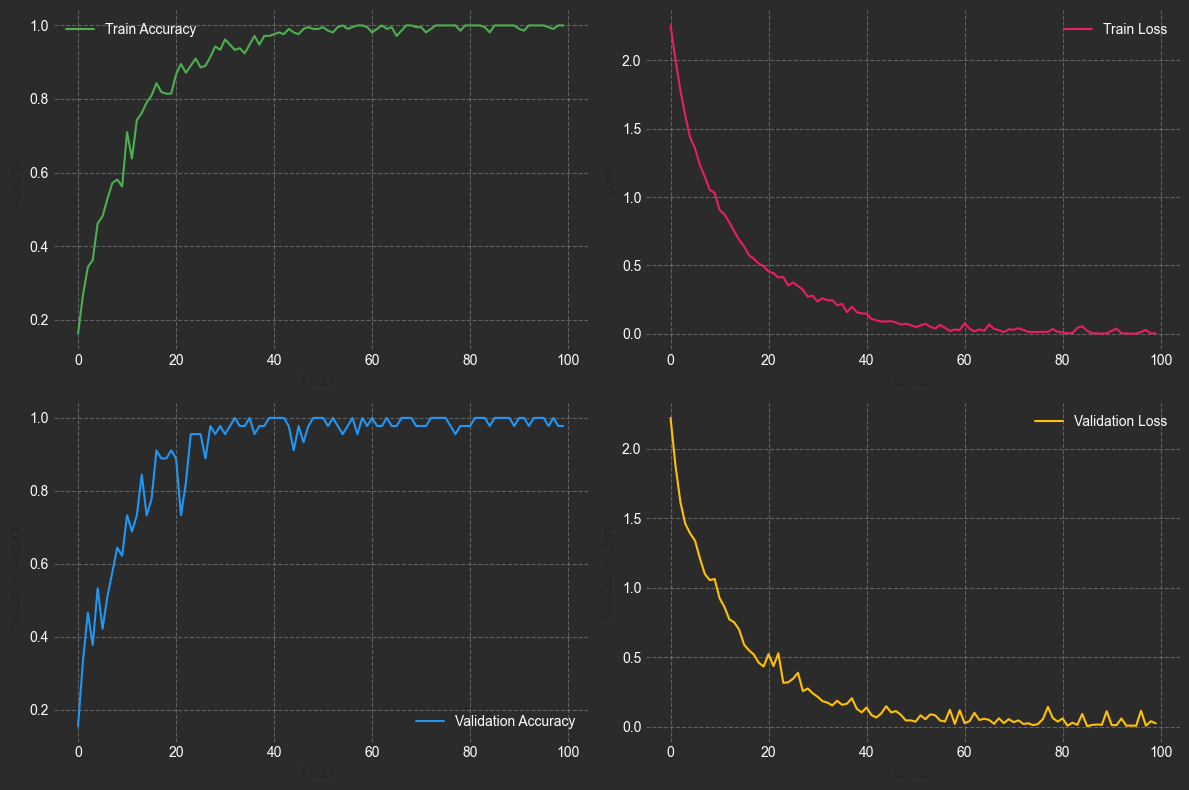

In [42]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = '#2b2b2b'  # Kolor tła
plt.rcParams['axes.edgecolor'] = '#2b2b2b'  # Kolor obramowania osi
plt.rcParams['figure.facecolor'] = '#2b2b2b'  # Kolor tła figury
plt.rcParams['grid.color'] = '#888888'  # Kolor siatki
plt.rcParams['text.color'] = '#ffffff'  # Kolor tekstu

# Wyświetlanie wykresów
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Wykres dokładności trenowania
axes[0, 0].plot(history_gru.history['categorical_accuracy'], label='Train Accuracy', color='#4CAF50')  # Zielony kolor
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()

# Wykres straty trenowania
axes[0, 1].plot(history_gru.history['loss'], label='Train Loss', color='#E91E63')  # Różowy kolor
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Wykres dokładności walidacji
axes[1, 0].plot(history_gru.history['val_categorical_accuracy'], label='Validation Accuracy', color='#2196F3')  # Niebieski kolor
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Validation Accuracy')
axes[1, 0].legend()

# Wykres straty walidacji
axes[1, 1].plot(history_gru.history['val_loss'], label='Validation Loss', color='#FFC107')  # Żółty kolor
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Validation Loss')
axes[1, 1].legend()

# Dostosowanie tła i cieniowanie krzywych
for ax in axes.flatten():
    ax.set_facecolor('#2b2b2b')  # Kolor tła dla każdego subplotu
    ax.spines[['left', 'right', 'top', 'bottom']].set_color('#2b2b2b')  # Kolor obramowania subplotów
    ax.tick_params(axis='x', colors='white')  # Kolor oznaczeń osi x
    ax.tick_params(axis='y', colors='white')  # Kolor oznaczeń osi y
    ax.grid(True, linestyle='--', alpha=0.6)  # Dodanie siatki z przezroczystością

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7940\4045060549.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



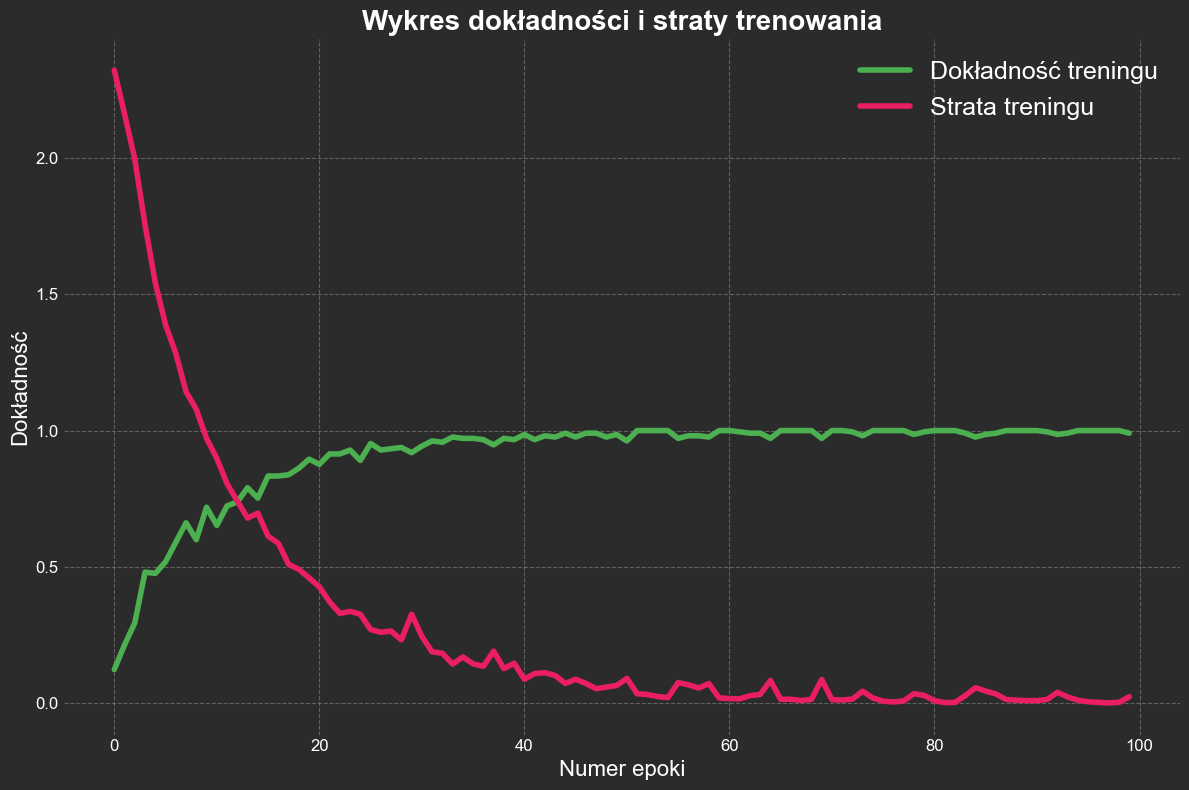

In [60]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = '#2b2b2b'  # Kolor tła
plt.rcParams['axes.edgecolor'] = '#2b2b2b'  # Kolor obramowania osi
plt.rcParams['figure.facecolor'] = '#2b2b2b'  # Kolor tła figury
plt.rcParams['grid.color'] = '#888888'  # Kolor siatki
plt.rcParams['text.color'] = '#ffffff'  # Kolor tekstu

# Wyświetlanie wykresu
fig, ax = plt.subplots(figsize=(12, 8))

# Wykres dokładności trenowania
ax.plot(history_gru.history['categorical_accuracy'], label='Dokładność treningu', color='#4CAF50', linewidth=4)  # Grubość linii
# ax.scatter(range(len(history_gru.history['categorical_accuracy'])), history_gru.history['categorical_accuracy'], color='#4CAF50', s=10)  # Siatki

# Wykres straty trenowania
ax.plot(history_gru.history['loss'], label='Strata treningu', color='#E91E63', linewidth=4)  # Grubość linii
# ax.scatter(range(len(history_gru.history['loss'])), history_gru.history['loss'], color='#E91E63', s=10)  # Siatki

# Dodanie tytułu do całego wykresu
plt.title('Wykres dokładności i straty trenowania', color='white', fontsize=20, fontweight='bold')

# Dostosowanie tła i cieniowanie krzywych
ax.set_facecolor('#2b2b2b')  # Kolor tła dla subplotu
ax.spines[['left', 'right']].set_color('#2b2b2b')  # Kolor obramowania subplotu
ax.tick_params(axis='x', colors='white', labelsize=12)  # Kolor oznaczeń osi x i rozmiar czcionki
ax.tick_params(axis='y', colors='white', labelsize=12)  # Kolor oznaczeń osi y i rozmiar czcionki
ax.grid(True, linestyle='--', alpha=0.6)  # Dodanie siatki z przezroczystością
ax.set_xlabel('Numer epoki', fontsize=16, color='white')  # Rozmiar czcionki i kolor tekstu dla etykiety x
ax.set_ylabel('Dokładność', fontsize=16, color='white')  # Rozmiar czcionki i kolor tekstu dla etykiety y
ax.legend(fontsize=18)  # Rozmiar czcionki legendy

plt.tight_layout()
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_7940\2227544785.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



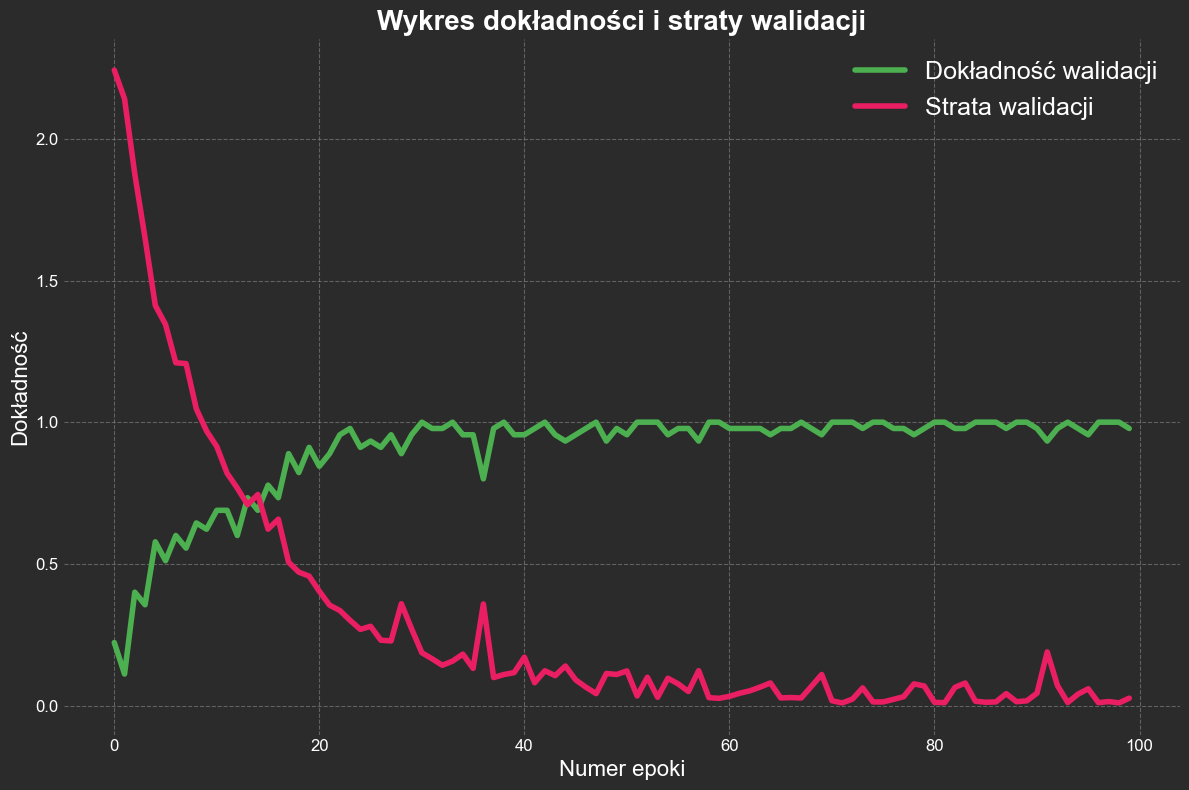

In [59]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = '#2b2b2b'  # Kolor tła
plt.rcParams['axes.edgecolor'] = '#2b2b2b'  # Kolor obramowania osi
plt.rcParams['figure.facecolor'] = '#2b2b2b'  # Kolor tła figury
plt.rcParams['grid.color'] = '#888888'  # Kolor siatki
plt.rcParams['text.color'] = '#ffffff'  # Kolor tekstu

# Wyświetlanie wykresu
fig, ax = plt.subplots(figsize=(12, 8))

# Wykres dokładności trenowania
ax.plot(history_gru.history['val_categorical_accuracy'], label='Dokładność walidacji', color='#4CAF50', linewidth=4)  # Grubość linii
# ax.scatter(range(len(history_gru.history['val_categorical_accuracy'])), history_gru.history['val_categorical_accuracy'], color='#4CAF50', s=10)  # Siatki

# Wykres straty trenowania
ax.plot(history_gru.history['val_loss'], label='Strata walidacji', color='#E91E63', linewidth=4)  # Grubość linii
# ax.scatter(range(len(history_gru.history['val_loss'])), history_gru.history['loss'], color='#E91E63', s=10)  # Siatki

# Dodanie tytułu do całego wykresu
plt.title('Wykres dokładności i straty walidacji', color='white', fontsize=20, fontweight='bold')

# Dostosowanie tła i cieniowanie krzywych
ax.set_facecolor('#2b2b2b')  # Kolor tła dla subplotu
ax.spines[['left', 'right']].set_color('#2b2b2b')  # Kolor obramowania subplotu
ax.tick_params(axis='x', colors='white', labelsize=12)  # Kolor oznaczeń osi x i rozmiar czcionki
ax.tick_params(axis='y', colors='white', labelsize=12)  # Kolor oznaczeń osi y i rozmiar czcionki
ax.grid(True, linestyle='--', alpha=0.6)  # Dodanie siatki z przezroczystością
ax.set_xlabel('Numer epoki', fontsize=16, color='white')  # Rozmiar czcionki i kolor tekstu dla etykiety x
ax.set_ylabel('Dokładność', fontsize=16, color='white')  # Rozmiar czcionki i kolor tekstu dla etykiety y
ax.legend(fontsize=18)  # Rozmiar czcionki legendy

plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score


y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(y_test, axis=1)

confusion = confusion_matrix(y_true_labels, y_pred_labels)

print("Macierz konfuzji:")
print(confusion)

print(accuracy_score(y_pred_labels, y_true_labels))

2/2 [==============================] - 4s 40ms/step
Macierz konfuzji:
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 1 0]
 [0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 4 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 6]]
0.9333333333333333


In [39]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)  


y_true = np.argmax(y_test, axis=1)  
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred)



precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

for i in range(len(precision)):
    print(f'Label {i} - Accuracy: {accuracy}, Precision: {precision[i]}, Recall: {recall[i]}, F1-Score: {f1[i]}')

2/2 [==============================] - 0s 15ms/step
Label 0 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 1 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 2 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 0.8571428571428571, F1-Score: 0.923076923076923
Label 3 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 0.8333333333333334, F1-Score: 0.9090909090909091
Label 4 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 5 - Accuracy: 0.9555555555555556, Precision: 0.7142857142857143, Recall: 1.0, F1-Score: 0.8333333333333333
Label 6 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 7 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 8 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 9 - Accuracy: 0.9555555555555556, Precision: 1.0, Recall: 1.0, F1-Score: 1.0


8/8 [==============================] - 0s 23ms/step
Average cross-validation accuracy (k=5): 0.9533333333333334 a dla pojedycznych k: [1.0, 0.9833333333333333, 0.9, 0.95, 0.9333333333333333]
Average difference between training and validation accuracy: 0.046666666666666676


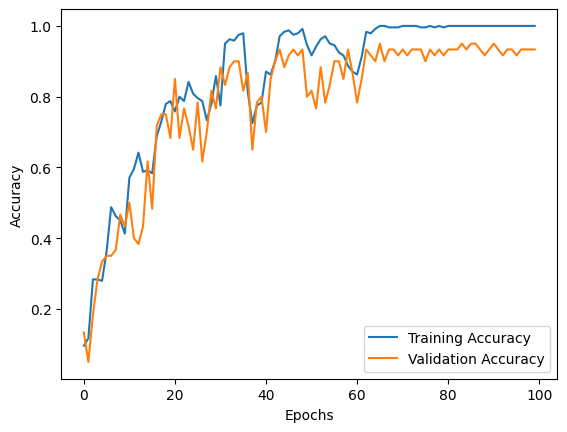

In [22]:
#kfolds
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Flatten
import matplotlib.pyplot as plt

k = 5

kf = KFold(n_splits=k, shuffle=True)


accuracies = []
train_accuracies = []
val_accuracies = []

for train_index, val_index in kf.split(X):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = Sequential()
    model.add(GRU(units=128, input_shape=(30, 1662), return_sequences=True))
    model.add(GRU(units=64, return_sequences=True))
    model.add(GRU(units=32, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(actions.shape[0], activation='softmax'))

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    history_gru = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
    accuracies.append(accuracy)

    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
    train_accuracies.append(train_accuracy)

    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
    val_accuracies.append(val_accuracy)


mean_accuracy = np.mean(accuracies)
print(f'Average cross-validation accuracy (k={k}): {mean_accuracy} a dla pojedycznych k: {accuracies}')

differences = [train_acc - val_acc for train_acc, val_acc in zip(train_accuracies, val_accuracies)]
mean_difference = np.mean(differences)
print(f'Average difference between training and validation accuracy: {mean_difference}')

plt.plot(history_gru.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# LSTM

In [10]:
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(30, 1662)))
# model.add(Dropout(0.2))  # Dropout dla regularyzacji
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(actions.shape[0], activation='softmax'))
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(Dropout(0.5))  # Dodaj Dropou
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model.add(Dropout(0.5))  # Dodaj Dropout
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(Dropout(0.5))  # Dodaj Dropout
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dropout(0.5))  # Dodaj Dropout
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



# model = Sequential()
# model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])



lstm = model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation))

Epoch 1/100
7/7 [==============================] - 13s 326ms/step - loss: 2.9099 - categorical_accuracy: 0.0905 - val_loss: 2.2874 - val_categorical_accuracy: 0.1778
Epoch 2/100
7/7 [==============================] - 1s 101ms/step - loss: 2.3006 - categorical_accuracy: 0.0952 - val_loss: 2.2960 - val_categorical_accuracy: 0.0444
Epoch 3/100
7/7 [==============================] - 1s 106ms/step - loss: 2.2548 - categorical_accuracy: 0.1429 - val_loss: 2.2019 - val_categorical_accuracy: 0.1111
Epoch 4/100
7/7 [==============================] - 1s 99ms/step - loss: 2.2334 - categorical_accuracy: 0.1524 - val_loss: 2.2698 - val_categorical_accuracy: 0.1556
Epoch 5/100
7/7 [==============================] - 1s 109ms/step - loss: 2.1732 - categorical_accuracy: 0.2143 - val_loss: 2.0472 - val_categorical_accuracy: 0.2667
Epoch 6/100
7/7 [==============================] - 1s 94ms/step - loss: 1.9668 - categorical_accuracy: 0.2333 - val_loss: 1.9079 - val_categorical_accuracy: 0.2000
Epoch 7/100

In [8]:
model.save_weights('lstm_weights.h5')

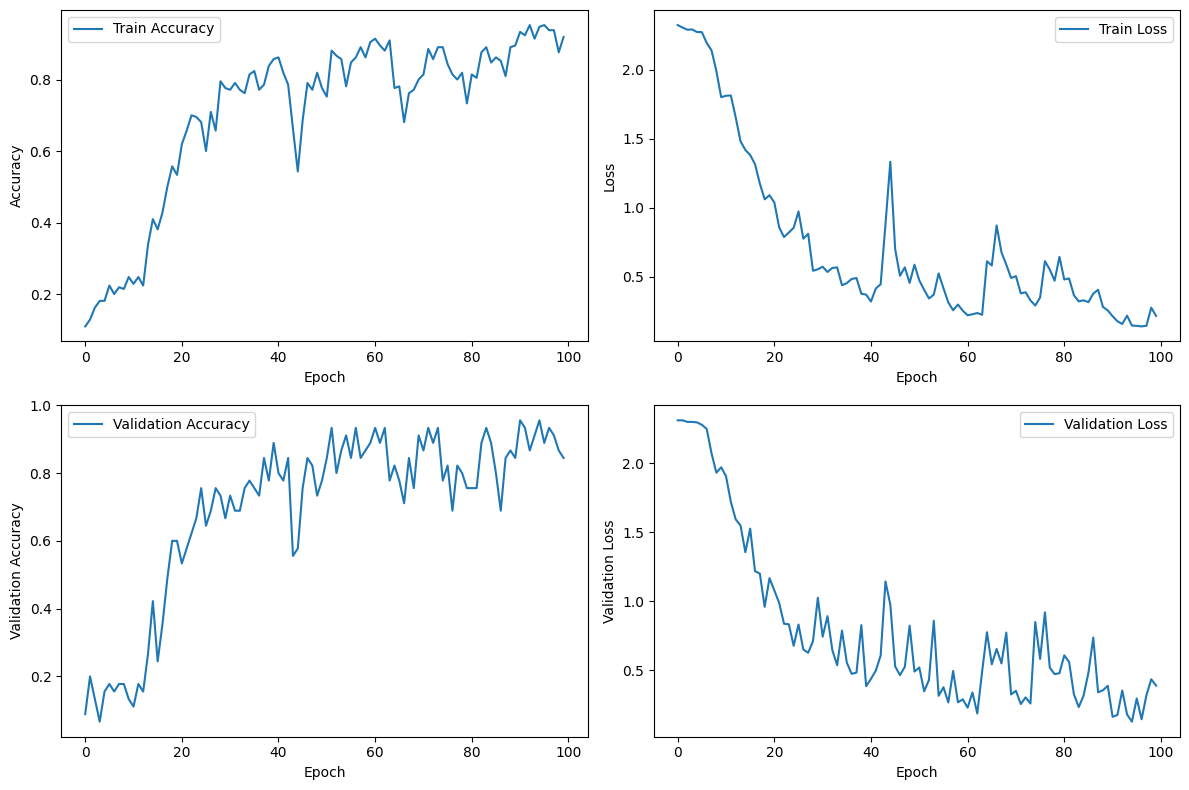

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.plot(lstm.history['categorical_accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(lstm.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(lstm.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = '#2b2b2b'  # Kolor tła
plt.rcParams['axes.edgecolor'] = '#2b2b2b'  # Kolor obramowania osi
plt.rcParams['figure.facecolor'] = '#2b2b2b'  # Kolor tła figury
plt.rcParams['grid.color'] = '#888888'  # Kolor siatki
plt.rcParams['text.color'] = '#ffffff'  # Kolor tekstu

# Wyświetlanie wykresu
fig, ax = plt.subplots(figsize=(12, 8))

# Wykres dokładności trenowania
ax.plot(lstm.history['categorical_accuracy'], label='Dokładność treningu', color='#4CAF50', linewidth=4)  # Grubość linii
# ax.scatter(range(len(history_gru.history['categorical_accuracy'])), history_gru.history['categorical_accuracy'], color='#4CAF50', s=10)  # Siatki

# Wykres straty trenowania
ax.plot(lstm.history['loss'], label='Strata treningu', color='#E91E63', linewidth=4)  # Grubość linii
# ax.scatter(range(len(history_gru.history['loss'])), history_gru.history['loss'], color='#E91E63', s=10)  # Siatki

# Dodanie tytułu do całego wykresu
plt.title('Wykres dokładności i straty trenowania', color='white', fontsize=20, fontweight='bold')

# Dostosowanie tła i cieniowanie krzywych
ax.set_facecolor('#2b2b2b')  # Kolor tła dla subplotu
ax.spines[['left', 'right']].set_color('#2b2b2b')  # Kolor obramowania subplotu
ax.tick_params(axis='x', colors='white', labelsize=12)  # Kolor oznaczeń osi x i rozmiar czcionki
ax.tick_params(axis='y', colors='white', labelsize=12)  # Kolor oznaczeń osi y i rozmiar czcionki
ax.grid(True, linestyle='--', alpha=0.6)  # Dodanie siatki z przezroczystością
ax.set_xlabel('Numer epoki', fontsize=16, color='white')  # Rozmiar czcionki i kolor tekstu dla etykiety x
ax.set_ylabel('Dokładność', fontsize=16, color='white')  # Rozmiar czcionki i kolor tekstu dla etykiety y
ax.legend(fontsize=18)  # Rozmiar czcionki legendy

plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(confusion_matrix(ytrue, yhat))
accuracy_score(ytrue, yhat)

2/2 [==============================] - 1s 13ms/step
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 4 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 6]]


0.9555555555555556

In [27]:
y_pred = model.predict(X_test)  


y_true = np.argmax(y_test, axis=1)  
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred)


from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

# Wyniki dla każdej etykiety
for i in range(len(precision)):
    print(f'Label {i} - Accuracy: {accuracy}, Precision: {precision[i]}, Recall: {recall[i]}, F1-Score: {f1[i]}')

2/2 [==============================] - 0s 9ms/step
Label 0 - Accuracy: 0.9333333333333333, Precision: 0.6666666666666666, Recall: 1.0, F1-Score: 0.8
Label 1 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 2 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 3 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 4 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 5 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 6 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 0.6666666666666666, F1-Score: 0.8
Label 7 - Accuracy: 0.9333333333333333, Precision: 0.8333333333333334, Recall: 0.7142857142857143, F1-Score: 0.7692307692307692
Label 8 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Label 9 - Accuracy: 0.9333333333333333, Precision: 1.0, Recall: 1.0, F1-Score: 1.0


kfolds

8/8 [==============================] - 0s 16ms/step
Średnia dokładność walidacji krzyżowej (k=5): 0.9566666666666667 a całość [0.95, 0.95, 0.8833333333333333, 1.0, 1.0]
Średnia różnica między treningową a walidacyjną dokładnością: nan


c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


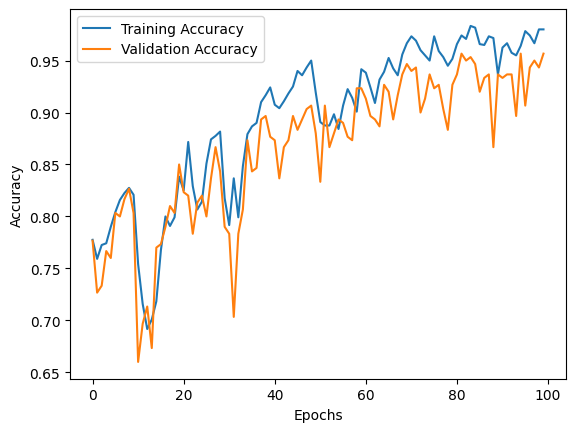

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
import matplotlib.pyplot as plt


k = 5

kf = KFold(n_splits=k, shuffle=True)

accuracies = []
train_accuracies = []
val_accuracies = []
histories = [] 


model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # model = Sequential()
    # model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30, 1662)))
    # model.add(LSTM(128, return_sequences=True, activation='relu'))
    # model.add(LSTM(64, return_sequences=False, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(actions.shape[0], activation='softmax'))    
    # model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


    history_lstm = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)
    histories.append(history_lstm)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
    accuracies.append(accuracy)

    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
    train_accuracies.append(train_accuracy)

mean_accuracy = np.mean(accuracies)
print(f'Średnia dokładność walidacji krzyżowej (k={k}): {mean_accuracy} a całość {accuracies}')

differences = [train_acc - val_acc for train_acc, val_acc in zip(train_accuracies, val_accuracies)]
mean_difference = np.mean(differences)
print(f'Średnia różnica między treningową a walidacyjną dokładnością: {mean_difference}')

avg_history = {}
for key in histories[0].history.keys():
    avg_history[key] = np.mean([fold.history[key] for fold in histories], axis=0)

plt.plot(avg_history['categorical_accuracy'], label='Training Accuracy')
plt.plot(avg_history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
